In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('diabetes.csv', header=None)
df.shape

(768, 9)

In [12]:
df.head

<bound method NDFrame.head of       0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]>

In [13]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.columns = col_names
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


for col in col_names:
    print(df[col].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26 

In [33]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [37]:
print (x_train.shape)
print (y_train.shape)

(514, 8)
(514,)


In [38]:
print (x_test.shape)
print (y_test.shape)

(254, 8)
(254,)


In [39]:
x_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [40]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [27]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [28]:
import category_encoders as ce

In [48]:
# Check the column names in x_train
print(x_train.columns)

# Verify that the specified columns are present
cols_to_encode = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
missing_columns = [col for col in cols_to_encode if col not in x_train.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All specified columns are present in x_train.")

# Check the content of the DataFrame to further diagnose the issue if needed
print(x_train.head())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Missing columns: ['Outcome']
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
464           10      115             98              0        0  24.0   
223            7      142             60             33      190  28.8   
393            4      116             72             12       87  22.1   
766            1      126             60              0        0  30.1   
570            3       78             70              0        0  32.5   

     DiabetesPedigreeFunction  Age  
464                     1.022   34  
223                     0.687   61  
393                     0.463   37  
766                     0.349   47  
570                     0.270   39  


In [49]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [55]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [56]:
y_pred_en= clf_en.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7165


In [59]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7665


In [62]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7665
Test set score: 0.7165


[Text(0.5, 0.875, 'X[1] <= 154.5\nentropy = 0.938\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'X[5] <= 26.35\nentropy = 0.822\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'X[1] <= 124.5\nentropy = 0.23\nsamples = 107\nvalue = [103, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.089\nsamples = 89\nvalue = [88, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(0.375, 0.375, 'X[7] <= 30.5\nentropy = 0.914\nsamples = 325\nvalue = [218, 107]'),
 Text(0.3125, 0.125, 'entropy = 0.694\nsamples = 177\nvalue = [144, 33]'),
 Text(0.4375, 0.125, 'entropy = 1.0\nsamples = 148\nvalue = [74, 74]'),
 Text(0.75, 0.625, 'X[5] <= 28.7\nentropy = 0.569\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'X[5] <= 25.35\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'X[0] <= 6.5\nentropy = 0.422\

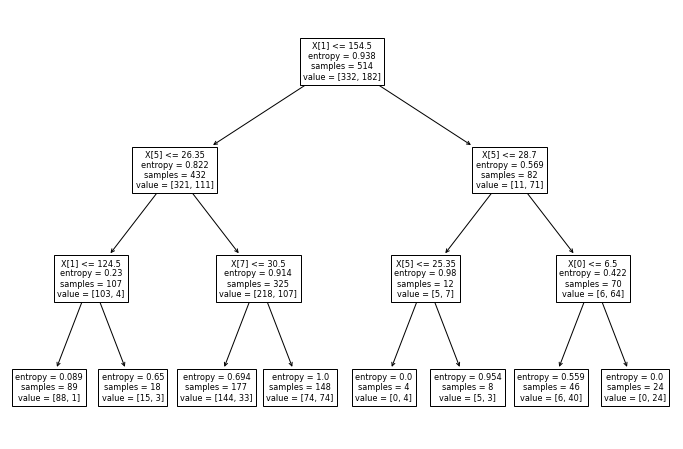

In [64]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

In [71]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [73]:
import graphviz
from sklearn import tree

# Define class names as a list
class_names = ["Class 0", "Class 1"]  # Adjust for your specific classes

dot_data = tree.export_graphviz(clf_en, out_file=None,
                                feature_names=x_train.columns,
                                class_names=class_names,  # Use the defined class names
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

# Display the decision tree
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion Matrix\n\n', cm)

Confusion Matrix

 [[157  11]
 [ 61  25]]


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       168
           1       0.69      0.29      0.41        86

    accuracy                           0.72       254
   macro avg       0.71      0.61      0.61       254
weighted avg       0.71      0.72      0.68       254

